# Customer Segmentation


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn to make statistic graphs

## Details about Data set

In [2]:
# importing data set
df = pd.read_csv("Customer_Details_and_Preferences.csv")
df.head()

,Gender,Age,Style,Type,Size,Mechanics,Protection,Strap,Water Resistance,Features,Bought(for $),Spending Score(1-100),Income(Family in k$)
0,Male,22,Sports,Both in one,32mm - 36 mm ( for medium wrists),Quartz ( Battery powered - highest accuracy- f...,Acrylic glass (type of plastic - prone to scra...,Nato,5 BAR / 5 ATM / 50m / 165ft (withstand splash...,Date,31,48,48
1,Male,29,Sports,Analog,32mm - 36 mm ( for medium wrists),Quartz ( Battery powered - highest accuracy- f...,Acrylic glass (type of plastic - prone to scra...,Rubber or Silicon,20 BAR / 20 ATM / 200m / 660ft (suitable for ...,Backlight,36,44,43
2,Male,18,Field,Digital,26mm - 30mm (for small wrists),Mechanical (manually wound ),Acrylic glass (type of plastic - prone to scra...,Leather,5 BAR / 5 ATM / 50m / 165ft (withstand splash...,Backlight,47,52,51
3,Female,20,Formal,Both in one,38mm - 40mm (Standard),Mechanical (manually wound ),Acrylic glass (type of plastic - prone to scra...,Rubber or Silicon,5 BAR / 5 ATM / 50m / 165ft (withstand splash...,Date,22,58,49
4,Male,26,Sports,Both in one,38mm - 40mm (Standard),Quartz ( Battery powered - highest accuracy- f...,Acrylic glass (type of plastic - prone to scra...,Nato,10 BAR / 10 ATM / 100m / 330f (suitable for s...,Date,20,53,51


In [3]:
df.shape

(37647, 13)

In [4]:
df.describe()

,Age,Bought(for $),Spending Score(1-100),Income(Family in k$)
count,37647.000000,37647.000000,37647.000000,37647.000000
mean,40.481207,50.790236,48.790661,42.822589
std,18.783980,36.842027,17.177577,20.088791
min,10.000000,1.000000,5.000000,1.000000
25%,25.000000,22.000000,40.000000,28.000000
50%,36.000000,44.000000,49.000000,39.000000
75%,54.000000,73.000000,58.000000,55.000000
max,85.000000,200.000000,93.000000,100.000000


### Density Graphs

C:\Users\lafri\AppData\Local\Temp\ipykernel_19580\1923584557.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
e:\Apps Uni\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lafri\AppData\Local\Temp\ipykernel_19580\1923584557.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

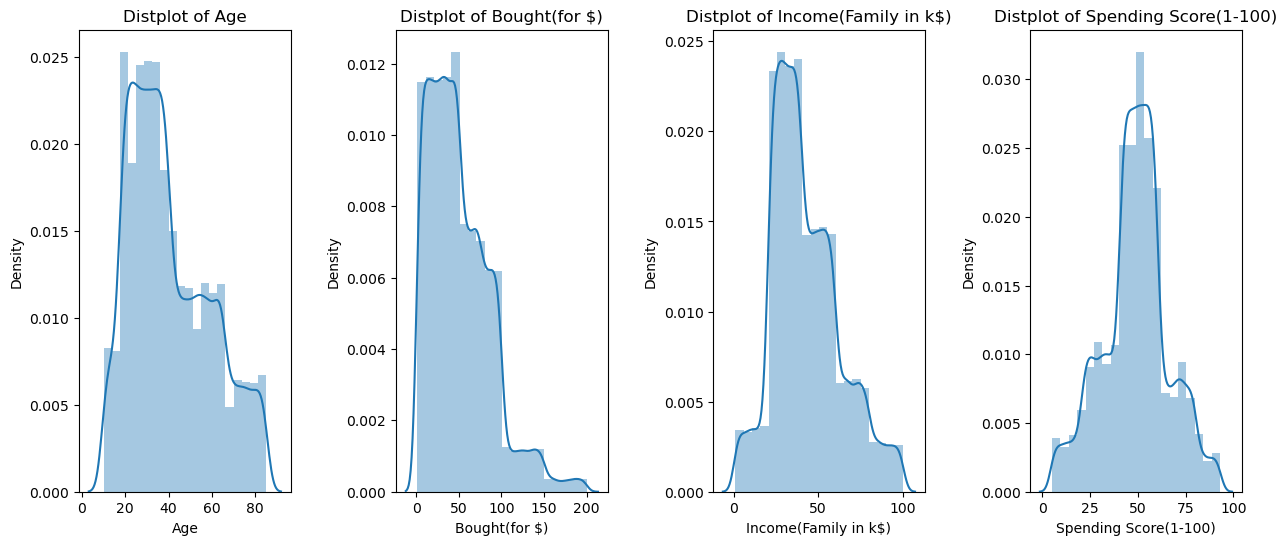

In [5]:
# Density graphs
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Bought(for $)', 'Income(Family in k$)', 'Spending Score(1-100)']:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

### Number of Male and Female

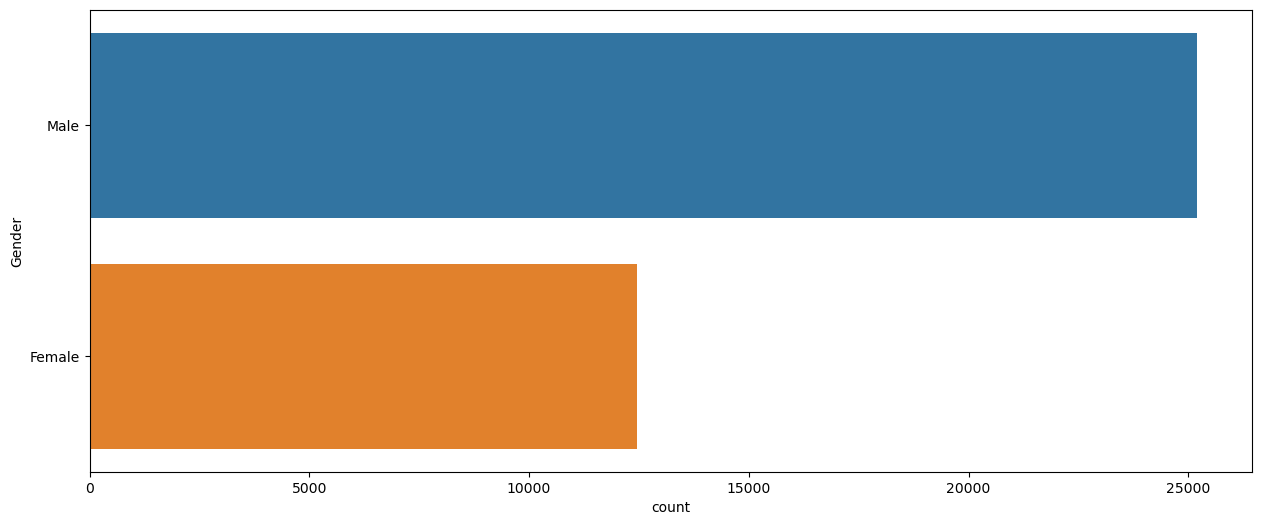

In [6]:
# Count Graphs for male and female
plt.figure(figsize=(15,6))
sns.countplot(y='Gender', data=df)
plt.show()

### Peaks of each Graphs

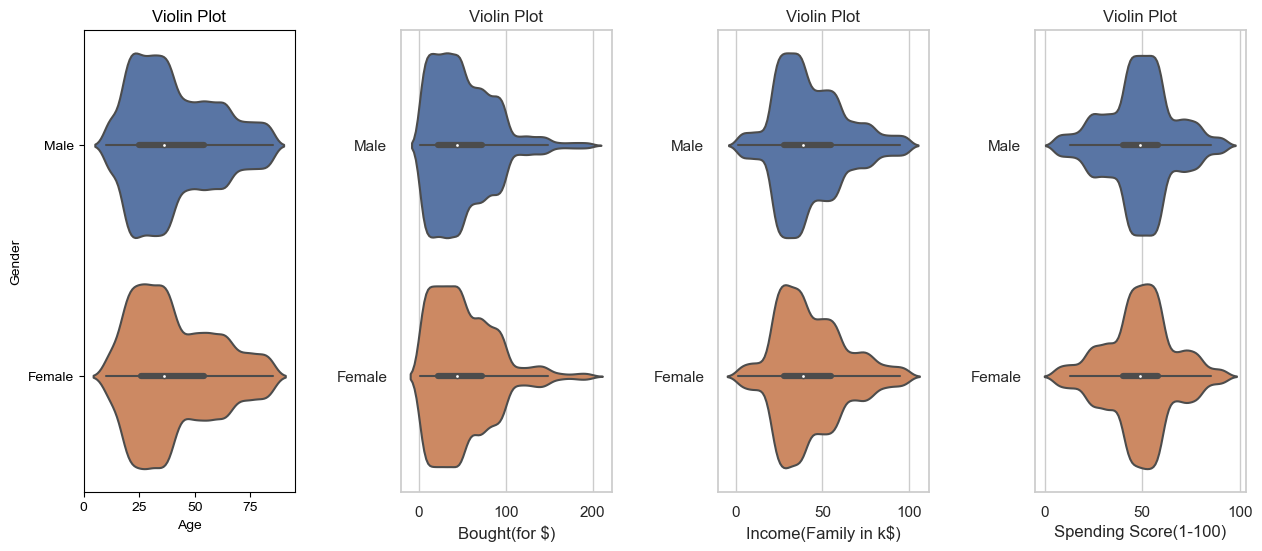

In [7]:
# taking the peaks of the data 
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age', 'Bought(for $)', 'Income(Family in k$)', 'Spending Score(1-100)']:
    n += 1
    plt.subplot(1,4,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else ' ')
    plt.title("Violin Plot")
plt.show()

## Grouping the Data

### Age

e:\Apps Uni\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


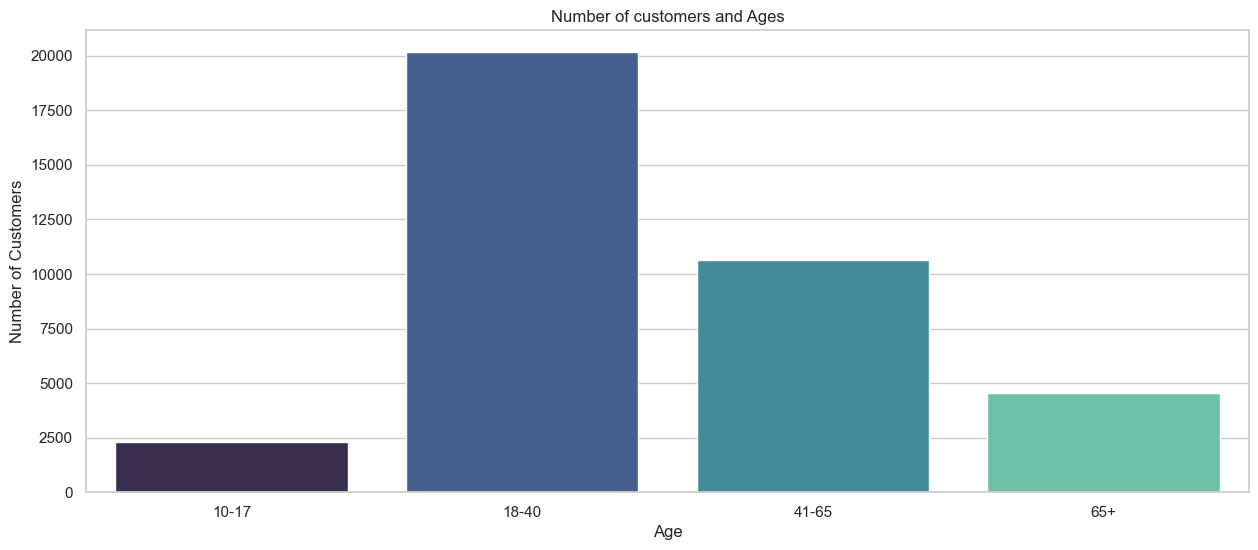

In [8]:
# Assigning the range group
age_10_17 = df.Age[(df.Age >= 10) & (df.Age <=17)]
age_18_40 = df.Age[(df.Age >= 18) & (df.Age <=40)]
age_41_65 = df.Age[(df.Age >= 41) & (df.Age <=65)]
age_65above = df.Age[df.Age >= 66]

# bar graph for each group
age_x = ['10-17', '18-40', '41-65', '65+']
age_y = [len(age_10_17.values), len(age_18_40.values), len(age_41_65.values), len(age_65above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=age_x, y=age_y, palette='mako')
plt.title("Number of customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

### Spending Score

e:\Apps Uni\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


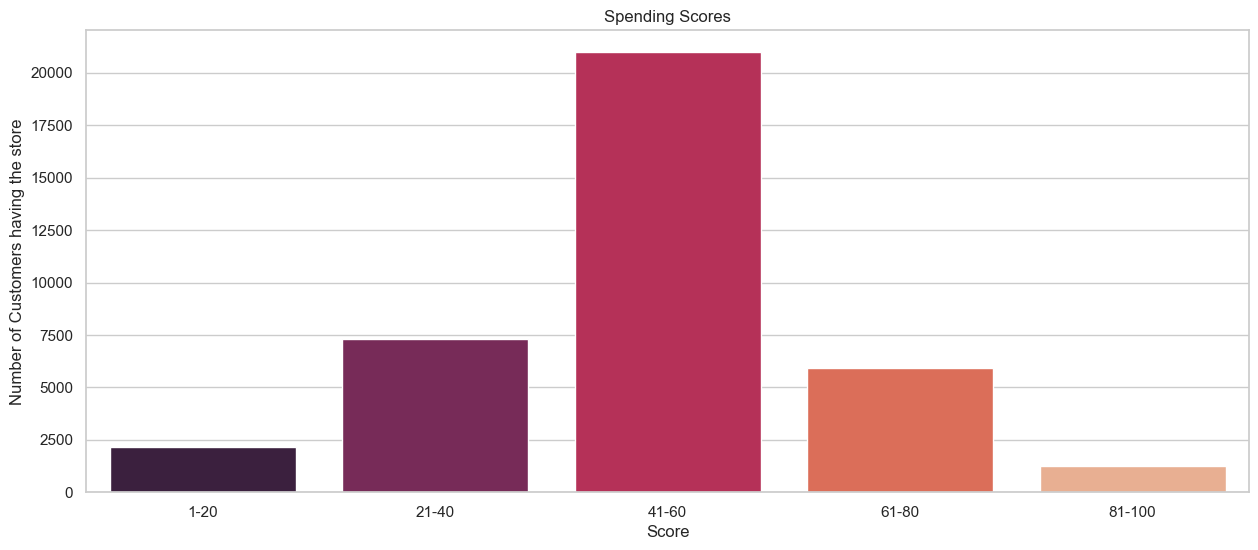

In [9]:
# Assigning the range group
ss_1_20 = df["Spending Score(1-100)"][(df["Spending Score(1-100)"] >= 1) & (df["Spending Score(1-100)"] <= 20)]
ss_21_40 = df["Spending Score(1-100)"][(df["Spending Score(1-100)"] >= 21) & (df["Spending Score(1-100)"] <= 40)]
ss_41_60 = df["Spending Score(1-100)"][(df["Spending Score(1-100)"] >= 41) & (df["Spending Score(1-100)"] <= 60)]
ss_61_80 = df["Spending Score(1-100)"][(df["Spending Score(1-100)"] >= 61) & (df["Spending Score(1-100)"] <= 80)]
ss_81_100 = df["Spending Score(1-100)"][(df["Spending Score(1-100)"] >= 81) & (df["Spending Score(1-100)"] <= 100)]

# bar graph for each group
ss_x = ['1-20','21-40', '41-60', '61-80', '81-100',]
ss_y = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ss_x, y=ss_y, palette='rocket')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the store")
plt.show()

### Income

e:\Apps Uni\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


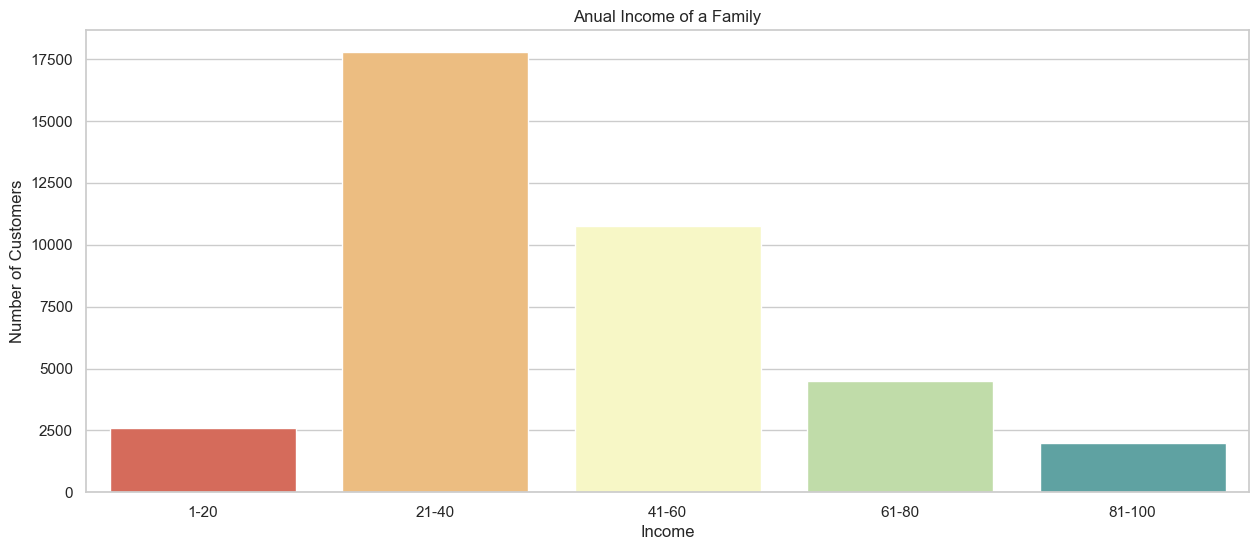

In [10]:
# Assigning the range group
in_1_20 = df["Income(Family in k$)"][(df["Income(Family in k$)"] >= 1) & (df["Income(Family in k$)"] <= 20)]
in_21_40 = df["Income(Family in k$)"][(df["Income(Family in k$)"] >= 21) & (df["Income(Family in k$)"] <= 40)]
in_41_60 = df["Income(Family in k$)"][(df["Income(Family in k$)"] >= 41) & (df["Income(Family in k$)"] <= 60)]
in_61_80 = df["Income(Family in k$)"][(df["Income(Family in k$)"] >= 61) & (df["Income(Family in k$)"] <= 80)]
in_81_100 = df["Income(Family in k$)"][(df["Income(Family in k$)"] >= 81) & (df["Income(Family in k$)"] <= 100)]

# bar graph for each group
in_x = ['1-20','21-40', '41-60', '61-80', '81-100',]
in_y = [len(in_1_20.values), len(in_21_40.values), len(in_41_60.values), len(in_61_80.values), len(in_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=in_x, y=in_y, palette='Spectral')
plt.title("Anual Income of a Family")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

## Elbow Method

finding the optimal number of clusters in a dataset.

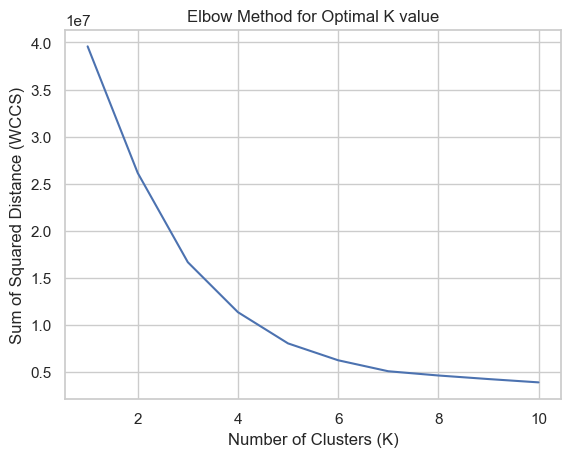

In [11]:
# Storing the relevant column details in x3
x3=df.loc[:, ["Age","Income(Family in k$)", "Spending Score(1-100)"]].values
from sklearn.cluster import KMeans

# empty list to store within cluster sum of squares
wcss=[]

# Creating Kmeans model for no of clusters k
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init='k-means++', n_init = 10)

    # Fitting the model to x3
    kmeans.fit(x3)

    # storing all wcss for all k values 
    wcss.append(kmeans.inertia_)


# Elbow Graph
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal K value')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distance (WCCS)')
plt.show()

Selecting the optimal number of clusters

In [12]:
# model with 7 clusters, 10 initializations
kmeans = KMeans(n_clusters=7, n_init=10)

# Predicting clusters
label = kmeans.fit_predict(x3)
print(label)

[3 3 3 ... 4 4 4]


In [13]:
print(kmeans.cluster_centers_)

[[29.59671963 30.56381343 50.39794977]
 [75.13204063 88.9122807  30.57479224]
 [53.13785326 30.50444474 72.37203131]
 [28.98172203 50.54203006 50.51976248]
 [72.65409229 12.81913102 29.46615022]
 [52.86376404 68.47659176 14.6755618 ]
 [13.46574154 70.43712056 30.42627927]]


### Graph to represent clusters

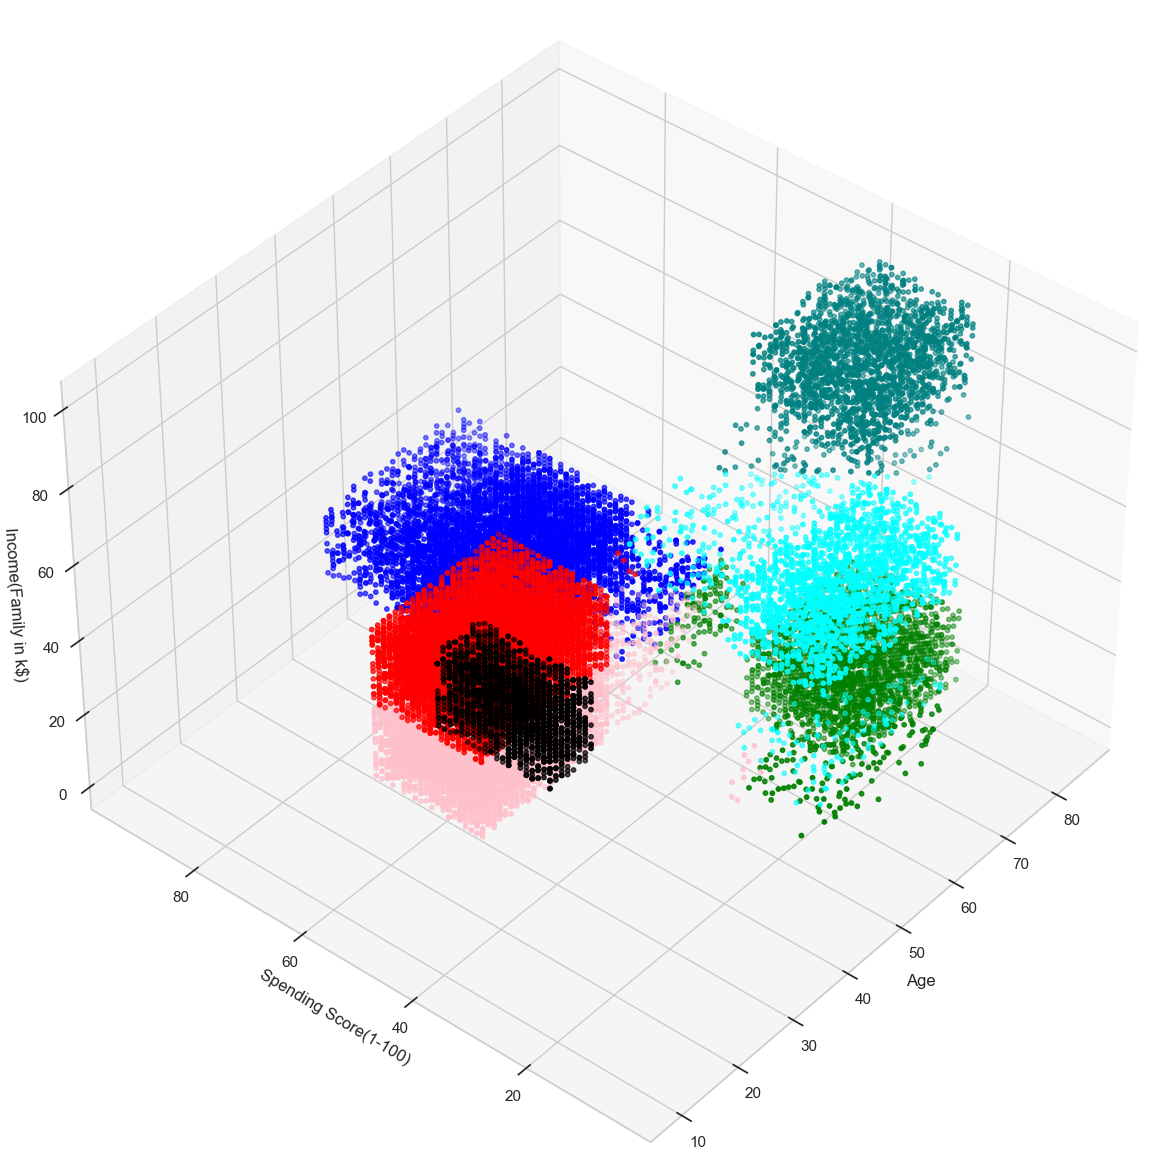

In [14]:
# assigning cluster labels to dataframe
clusters = kmeans.fit_predict(x3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

# giving different colors for each clusters
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Spending Score(1-100)"][df.label == 0], df["Income(Family in k$)"][df.label == 0], c='blue', s=10)
ax.scatter(df.Age[df.label == 1], df["Spending Score(1-100)"][df.label == 1], df["Income(Family in k$)"][df.label == 1], c='red', s=10)
ax.scatter(df.Age[df.label == 2], df["Spending Score(1-100)"][df.label == 2], df["Income(Family in k$)"][df.label == 2], c='green', s=10)
ax.scatter(df.Age[df.label == 3], df["Spending Score(1-100)"][df.label == 3], df["Income(Family in k$)"][df.label == 3], c='teal', s=10)
ax.scatter(df.Age[df.label == 4], df["Spending Score(1-100)"][df.label == 4], df["Income(Family in k$)"][df.label == 4], c='pink', s=10)
ax.scatter(df.Age[df.label == 5], df["Spending Score(1-100)"][df.label == 5], df["Income(Family in k$)"][df.label == 5], c='cyan', s=10)
ax.scatter(df.Age[df.label == 6], df["Spending Score(1-100)"][df.label == 6], df["Income(Family in k$)"][df.label == 6], c='black', s=10)

# vieving angle
ax.view_init(40,220)

plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
ax.set_zlabel('Income(Family in k$)')

plt.show()

# Finding The Accuaracy using Silhouette score
## The silhouette score ranges from -1 to 1, and a higher score generally indicates better-defined clusters. 

Here's a rough interpretation of silhouette score
### Near 1: The clusters are well-separated.
### Around 0: Overlapping clusters.
### Less than 0: Incorrect clustering.ering.


In [15]:
from sklearn.metrics import silhouette_score

# silhouette score between -1 to 1
silhouette_avg = silhouette_score(x3, label)
print("Silhouette Score:", silhouette_avg)

#  changing the silhouette score between 0 to 1
silhouette_0_to_1 = (silhouette_avg + 1) / 2
print("Silhouette Score(0 to 1):", silhouette_0_to_1)

# silhouette in percentage
silhouette_percentage = silhouette_0_to_1 * 100
print("Accuracy according to the Silhouette Score (Percentage):", silhouette_percentage)

Silhouette Score: 0.45696417419159374
Silhouette Score(0 to 1): 0.7284820870957969
Accuracy according to the Silhouette Score (Percentage): 72.8482087095797


### The score is positive and closer to 1, so that the clusters are well-separated.
### Silhouette score of 0.457 indicates that the clusters are reasonably well-separated. 

# Most Common Details of Each segment

In [16]:
# Looping through unique segments
for segment_id in df['label'].unique():

    # selecting the datas belong to that unique segment
    segment_data = df[df['label'] == segment_id]

    # Find the most common value in each column
    common_details = {}
    
    for column in segment_data.columns:
        #counting the common values and taking the max
        common_value = segment_data[column].value_counts().idxmax()
        common_details[column] = common_value
    
    print(f"Most common details for Segment {segment_id}:\n{common_details}")
    print("===========================================================================================================================================")

Most common details for Segment 1:
{'Gender': 'Male', 'Age': 21, 'Style': 'Sports', 'Type': 'Both in one', 'Size': '38mm - 40mm (Standard)', 'Mechanics': 'Quartz ( Battery powered - highest accuracy- for digital and analog both)', 'Protection': 'Acrylic glass (type of plastic - prone to scratches)', 'Strap': 'Rubber or Silicon', 'Water Resistance': '5 BAR / 5 ATM / 50m / 165ft  (withstand splashes, shower, suitable for swimming)', 'Features': 'Date', 'Bought(for $)': 7, 'Spending Score(1-100)': 56, 'Income(Family in k$)': 54, 'label': 1}
Most common details for Segment 6:
{'Gender': 'Male', 'Age': 11, 'Style': 'Sports', 'Type': 'Both in one', 'Size': '38mm - 40mm (Standard)', 'Mechanics': 'Quartz ( Battery powered - highest accuracy- for digital and analog both)', 'Protection': 'Acrylic glass (type of plastic - prone to scratches)', 'Strap': 'Rubber or Silicon', 'Water Resistance': '5 BAR / 5 ATM / 50m / 165ft  (withstand splashes, shower, suitable for swimming)', 'Features': 'Date', '